In [ ]:
import numpy as np
import torch
from torch import nn
import tqdm

import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
# Use the following code to load and normalize the dataset for training and testing
# It will downlad the dataset into data subfolder (change to your data folder name)
train_dataset = torchvision.datasets.FashionMNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

test_dataset = torchvision.datasets.FashionMNIST('data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))


# Use the following code to create a validation set of 10%
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_dataset)),
    train_dataset.targets,
    stratify=train_dataset.targets,
    test_size=0.1,
)

# Generate training and validation subsets based on indices
train_split = Subset(train_dataset, train_indices)
val_split = Subset(train_dataset, val_indices)


# set batches sizes
train_batch_size = 512 #Define train batch size
test_batch_size  = 256 #Define test batch size (can be larger than train batch size)


# Define dataloader objects that help to iterate over batches and samples for
# training, validation and testing
train_batches = DataLoader(train_split, batch_size=train_batch_size, shuffle=True)
val_batches = DataLoader(val_split, batch_size=train_batch_size, shuffle=True)
test_batches = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=True)

num_train_batches=len(train_batches)
num_val_batches=len(val_batches)
num_test_batches=len(test_batches)


print(num_train_batches)
print(num_val_batches)
print(num_test_batches)


#Sample code to visulaize the first sample in first 16 batches

# batch_num = 0
# for train_features, train_labels in train_batches:

#     if batch_num == 16:
#         break    # break here

#     batch_num = batch_num +1
#     print(f"Feature batch shape: {train_features.size()}")
#     print(f"Labels batch shape: {train_labels.size()}")

#     img = train_features[0].squeeze()
#     label = train_labels[0]
#     plt.imshow(img, cmap="gray")
#     plt.show()
#     print(f"Label: {label}")



# #Sample code to plot N^2 images from the dataset
# def plot_images(XX, N, title):
#     fig, ax = plt.subplots(N, N, figsize=(8, 8))

#     for i in range(N):
#       for j in range(N):
#         ax[i,j].imshow(XX[(N)*i+j], cmap="Greys")
#         ax[i,j].axis("off")
#     fig.suptitle(title, fontsize=24)

# plot_images(train_dataset.data[:64], 8, "First 64 Training Images")

100%|██████████| 26421880/26421880 [00:01<00:00, 18337393.69it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 341149.27it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6079865.87it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14718661.89it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

106
12
40


In [ ]:
import torch.nn.init as init

#Define your (As Cool As It Gets) Fully Connected Neural Network
class ACAIGFCN2(nn.Module):
    #Initialize model layers, add additional arguments to adjust
    def __init__(self, input_dim, output_dim, hidden1_dim, hidden2_dim):
        super(ACAIGFCN2, self).__init__()

        self.layer1 = torch.nn.Linear(input_dim, hidden1_dim)
        self.layer2 = torch.nn.Linear(hidden1_dim, hidden2_dim)
        self.layer3 = torch.nn.Linear(hidden2_dim, output_dim)

#Define the network layer(s) and activation function(s)
    def forward(self, x):
            #Define how your model propagates the input through the network
            out1 = torch.nn.functional.relu(self.layer1(x))
            out2 = torch.nn.functional.relu(self.layer2(out1))
            output = self.layer3(out2)

            return output

#Define your (As Cool As It Gets) Fully Connected Neural Network
class ACAIGFCN1(nn.Module):
    #Initialize model layers, add additional arguments to adjust
    def __init__(self, input_dim, output_dim, hidden1_dim):
        super(ACAIGFCN1, self).__init__()

        self.layer1 = torch.nn.Linear(input_dim, hidden1_dim)
        self.layer2 = torch.nn.Linear(hidden1_dim, output_dim)

#Define the network layer(s) and activation function(s)
    def forward(self, x):
            #Define how your model propagates the input through the network
            out1 = torch.nn.functional.relu(self.layer1(x))
            output = self.layer2(out1)

            return output


#Define your (As Cool As It Gets) Fully Connected Neural Network
class ACAIGFCN3(nn.Module):
    #Initialize model layers, add additional arguments to adjust
    def __init__(self, input_dim, output_dim, hidden1_dim, hidden2_dim, hidden3_dim):
        super(ACAIGFCN3, self).__init__()

        self.layer1 = torch.nn.Linear(input_dim, hidden1_dim)
        self.layer2 = torch.nn.Linear(hidden1_dim, hidden2_dim)
        self.layer3 = torch.nn.Linear(hidden2_dim, hidden3_dim)
        self.layer4 = torch.nn.Linear(hidden3_dim, output_dim)


#Define the network layer(s) and activation function(s)
    def forward(self, x):
            #Define how your model propagates the input through the network
            out1 = torch.nn.functional.relu(self.layer1(x))
            out2 = torch.nn.functional.relu(self.layer2(out1))
            out3 = torch.nn.functional.relu(self.layer3(out2))
            output = self.layer4(out3)

            return output


#Define your (As Cool As It Gets) Fully Connected Neural Network
class ACAIGFCN_dropout(nn.Module):
    #Initialize model layers, add additional arguments to adjust
    def __init__(self, input_dim, output_dim, hidden1_dim):
        super(ACAIGFCN_dropout, self).__init__()

        self.layer1 = torch.nn.Linear(input_dim, hidden1_dim)
        self.layer2 = torch.nn.Linear(hidden1_dim, output_dim)
        self.dropout = nn.Dropout(p=0.5) #drop out probability

#Define the network layer(s) and activation function(s)
    def forward(self, x):
            #Define how your model propagates the input through the network
            out1 = torch.nn.functional.relu(self.layer1(x))
            out2 = self.dropout(out1)
            output = self.layer2(out2)

            return output



class ACAIGFCN_batch_norm(nn.Module):
    #Initialize model layers, add additional arguments to adjust
    def __init__(self, input_dim, output_dim, hidden1_dim):
        super(ACAIGFCN_batch_norm, self).__init__()

        self.layer1 = nn.Linear(input_dim, hidden1_dim)
        self.bn1 = nn.BatchNorm1d(hidden1_dim)  # Add BatchNorm1d layer
        self.layer2 = nn.Linear(hidden1_dim, output_dim)
        self.bn2 = nn.BatchNorm1d(output_dim)  # Add BatchNorm1d layer

    def forward(self, x):
        out1 = self.layer1(x)
        out1 = self.bn1(out1)  # Apply BatchNorm1d
        out1 = torch.relu(out1)

        output = self.layer2(out1)
        output = self.bn2(output)  # Apply BatchNorm1d

        return

class ACAIGFCN_Xavier(nn.Module):
    def __init__(self, input_dim, output_dim, hidden1_dim):
        super(ACAIGFCN_Xavier, self).__init__()

        self.layer1 = torch.nn.Linear(input_dim, hidden1_dim)
        init.xavier_normal_(self.layer1.weight)  # Apply Xavier Normal initialization to layer1 weights
        self.layer2 = torch.nn.Linear(hidden1_dim, output_dim)
        init.xavier_normal_(self.layer2.weight)  # Apply Xavier Normal initialization to layer2 weights

    def forward(self, x):
        out1 = torch.nn.functional.relu(self.layer1(x))
        output = self.layer2(out1)
        return output

In [ ]:
# Initialize neural network model with input, output and hidden layer dimensions
model = ACAIGFCN_Xavier(input_dim = 784, output_dim = 10, hidden1_dim = 128) #... add more parameters

# Define the learning rate and epochs number
learning_rate = 0.01
epochs = 50


train_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))
validation_acc_std_list = np.zeros((epochs,))

# Define loss function  and optimizer
loss_func = torch.nn.CrossEntropyLoss()# Use Cross Entropy loss from torch.nn
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)# Use optimizers from torch.optim
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adadelta(model.parameters(), lr = learning_rate)

# Iterate over epochs, batches with progress bar and train+ validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm.trange(epochs):
    train_batch_loss = np.zeros((int(num_train_batches),))
    counter = 0;

    # ACAIGFCN Training
    for train_features, train_labels in train_batches:
        # Set model into training mode
        model.train()

        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()

        train_outputs = model(train_features)
        loss = loss_func(train_outputs, train_labels)

        # Perfrom optimization, back propagation
        loss.backward()
        optimizer.step()

        train_batch_loss[counter] = loss

        counter = counter + 1


    # Record loss for the epoch
    #train_loss_list[epoch] = loss.item()
    train_loss_list[epoch] = np.sum(train_batch_loss)

    #track validation accuracy for each validation batch
    val_batch_acc = np.zeros((num_val_batches,))
    counter = 0

    # ACAIGFCN Validation
    for val_features, val_labels in val_batches:

        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            model.eval()

             # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (targets)
            validation_outputs = model(val_features)
            # and compute accuracy
            correct = (torch.argmax(validation_outputs, dim=1) ==
                   val_labels).type(torch.FloatTensor)

            #record validation acc and std at this batch
            val_batch_acc[counter] = correct.mean()
            counter = counter + 1

    # Record accuracy for the epoch; print training loss, validation accuracy
    val_acc = np.mean(val_batch_acc)
    val_std = np.std(val_batch_acc)
    validation_accuracy_list[epoch] = val_acc
    validation_acc_std_list[epoch] = val_std


    print("Epoch: "+ str(epoch) +"; Validation Accuracy:" + str(val_acc*100) + '+/-'+ str(val_std*100) + '%')


  2%|▏         | 1/50 [00:13<11:09, 13.66s/it]

Epoch: 0; Validation Accuracy:76.20725780725479+/-2.114839040729932%


  4%|▍         | 2/50 [00:27<10:57, 13.69s/it]

Epoch: 1; Validation Accuracy:78.99966041247049+/-2.367934318369053%


  6%|▌         | 3/50 [00:40<10:35, 13.53s/it]

Epoch: 2; Validation Accuracy:80.63858697811762+/-2.6441687857283216%


  8%|▊         | 4/50 [00:53<10:13, 13.33s/it]

Epoch: 3; Validation Accuracy:81.2103713552157+/-1.6403901581237488%


 10%|█         | 5/50 [01:06<09:54, 13.21s/it]

Epoch: 4; Validation Accuracy:81.8323994676272+/-1.948271406580884%


 12%|█▏        | 6/50 [01:19<09:38, 13.14s/it]

Epoch: 5; Validation Accuracy:82.45230416456857+/-1.4592043954640053%


 14%|█▍        | 7/50 [01:32<09:23, 13.10s/it]

Epoch: 6; Validation Accuracy:82.69502967596054+/-1.9375027420764266%


 16%|█▌        | 8/50 [01:45<09:10, 13.11s/it]

Epoch: 7; Validation Accuracy:82.86769688129425+/-1.5261858345992863%


 18%|█▊        | 9/50 [01:59<08:57, 13.12s/it]

Epoch: 8; Validation Accuracy:83.03682655096054+/-0.7402810994892308%


 20%|██        | 10/50 [02:11<08:41, 13.03s/it]

Epoch: 9; Validation Accuracy:83.47203334172568+/-2.192095930811835%


 22%|██▏       | 11/50 [02:24<08:25, 12.97s/it]

Epoch: 10; Validation Accuracy:83.78198593854904+/-1.360498259888312%


 24%|██▍       | 12/50 [02:37<08:12, 12.95s/it]

Epoch: 11; Validation Accuracy:83.81453802188238+/-1.9499256459954328%


 26%|██▌       | 13/50 [02:50<08:00, 12.98s/it]

Epoch: 12; Validation Accuracy:84.32192603747049+/-1.746302302347175%


 28%|██▊       | 14/50 [03:03<07:50, 13.06s/it]

Epoch: 13; Validation Accuracy:84.25469895203909+/-1.5714886473752299%


 30%|███       | 15/50 [03:16<07:35, 13.02s/it]

Epoch: 14; Validation Accuracy:84.17897969484329+/-1.4945953640952039%


 32%|███▏      | 16/50 [03:29<07:23, 13.05s/it]

Epoch: 15; Validation Accuracy:84.55545157194138+/-1.9162468735245792%


 34%|███▍      | 17/50 [03:42<07:07, 12.95s/it]

Epoch: 16; Validation Accuracy:84.7203349073728+/-1.0444871851667572%


 36%|███▌      | 18/50 [03:55<06:53, 12.92s/it]

Epoch: 17; Validation Accuracy:84.76633280515671+/-1.2665361294323234%


 38%|███▊      | 19/50 [04:08<06:38, 12.87s/it]

Epoch: 18; Validation Accuracy:84.88097240527472+/-1.42057921306768%


 40%|████      | 20/50 [04:21<06:25, 12.84s/it]

Epoch: 19; Validation Accuracy:84.97225989898047+/-1.212235881508992%


 42%|████▏     | 21/50 [04:33<06:11, 12.81s/it]

Epoch: 20; Validation Accuracy:84.82931405305862+/-1.5619171233107556%


 44%|████▍     | 22/50 [04:46<06:01, 12.91s/it]

Epoch: 21; Validation Accuracy:85.18597135941187+/-1.4451471484277778%


 46%|████▌     | 23/50 [04:59<05:48, 12.90s/it]

Epoch: 22; Validation Accuracy:85.26098281145096+/-1.3318010592838088%


 48%|████▊     | 24/50 [05:12<05:34, 12.87s/it]

Epoch: 23; Validation Accuracy:85.32325625419617+/-1.1476690154439135%


 50%|█████     | 25/50 [05:25<05:21, 12.87s/it]

Epoch: 24; Validation Accuracy:84.9510302146276+/-1.6400034232765963%


 52%|█████▏    | 26/50 [05:38<05:08, 12.84s/it]

Epoch: 25; Validation Accuracy:85.36854634682336+/-1.6945156236355352%


 54%|█████▍    | 27/50 [05:50<04:54, 12.81s/it]

Epoch: 26; Validation Accuracy:85.32467186450958+/-1.3039330522994976%


 56%|█████▌    | 28/50 [06:04<04:46, 13.02s/it]

Epoch: 27; Validation Accuracy:85.52635312080383+/-1.7480162419410208%


 58%|█████▊    | 29/50 [06:17<04:35, 13.11s/it]

Epoch: 28; Validation Accuracy:85.60914844274521+/-1.418228901092495%


 60%|██████    | 30/50 [06:31<04:24, 13.20s/it]

Epoch: 29; Validation Accuracy:85.63320885101953+/-1.5112937317654336%


 62%|██████▏   | 31/50 [06:44<04:10, 13.17s/it]

Epoch: 30; Validation Accuracy:85.63957760731378+/-0.899344220772207%


 64%|██████▍   | 32/50 [06:57<03:57, 13.18s/it]

Epoch: 31; Validation Accuracy:85.75563281774521+/-1.0596703400086571%


 66%|██████▌   | 33/50 [07:10<03:43, 13.14s/it]

Epoch: 32; Validation Accuracy:85.68769792715707+/-1.0479920323795995%


 68%|██████▊   | 34/50 [07:23<03:29, 13.07s/it]

Epoch: 33; Validation Accuracy:85.86461146672568+/-1.333141321000021%


 70%|███████   | 35/50 [07:36<03:16, 13.07s/it]

Epoch: 34; Validation Accuracy:85.90565572182336+/-1.7738076796358315%


 72%|███████▏  | 36/50 [07:49<03:03, 13.09s/it]

Epoch: 35; Validation Accuracy:85.82781354586282+/-1.9022006446094557%


 74%|███████▍  | 37/50 [08:02<02:49, 13.04s/it]

Epoch: 36; Validation Accuracy:86.06912344694138+/-1.1900638342711378%


 76%|███████▌  | 38/50 [08:15<02:35, 13.00s/it]

Epoch: 37; Validation Accuracy:85.96156040827432+/-1.5789578411830072%


 78%|███████▊  | 39/50 [08:28<02:22, 12.99s/it]

Epoch: 38; Validation Accuracy:86.1717333396276+/-1.5440163758945509%


 80%|████████  | 40/50 [08:41<02:11, 13.14s/it]

Epoch: 39; Validation Accuracy:85.99694271882376+/-1.0502920518171253%


 82%|████████▏ | 41/50 [08:54<01:57, 13.09s/it]

Epoch: 40; Validation Accuracy:86.22763802607855+/-1.4354230045436387%


 84%|████████▍ | 42/50 [09:08<01:44, 13.11s/it]

Epoch: 41; Validation Accuracy:86.3189255197843+/-0.9487618637135912%


 86%|████████▌ | 43/50 [09:21<01:32, 13.15s/it]

Epoch: 42; Validation Accuracy:85.99906613429388+/-1.7027626812143382%


 88%|████████▊ | 44/50 [09:35<01:20, 13.43s/it]

Epoch: 43; Validation Accuracy:86.38827552398047+/-1.3583615921189498%


 90%|█████████ | 45/50 [09:48<01:06, 13.38s/it]

Epoch: 44; Validation Accuracy:86.15262657403946+/-1.36330219626664%


 92%|█████████▏| 46/50 [10:01<00:53, 13.32s/it]

Epoch: 45; Validation Accuracy:86.49371614058813+/-1.8485023084958407%


 94%|█████████▍| 47/50 [10:15<00:40, 13.50s/it]

Epoch: 46; Validation Accuracy:86.53405209382376+/-1.0978876025226192%


 96%|█████████▌| 48/50 [10:28<00:26, 13.32s/it]

Epoch: 47; Validation Accuracy:86.37766093015671+/-1.8078657644762475%


 98%|█████████▊| 49/50 [10:41<00:13, 13.24s/it]

Epoch: 48; Validation Accuracy:86.41870468854904+/-1.5614818310865057%


100%|██████████| 50/50 [10:54<00:00, 13.10s/it]

Epoch: 49; Validation Accuracy:86.43922656774521+/-0.9772972848127157%


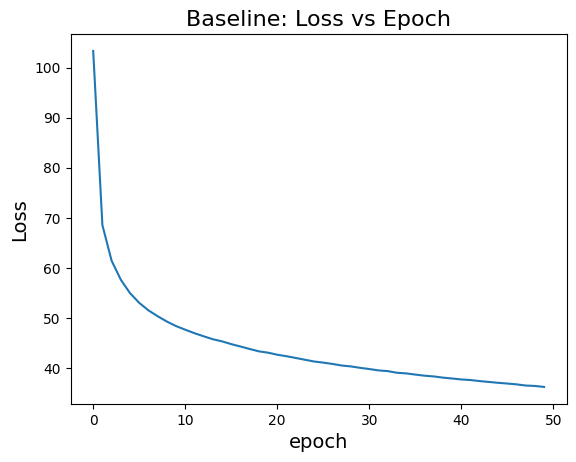

In [ ]:
plt.figure()
plt.plot(train_loss_list)
plt.title("Baseline: Loss vs Epoch", fontsize = 16)
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('epoch', fontsize = 14)
plt.show()

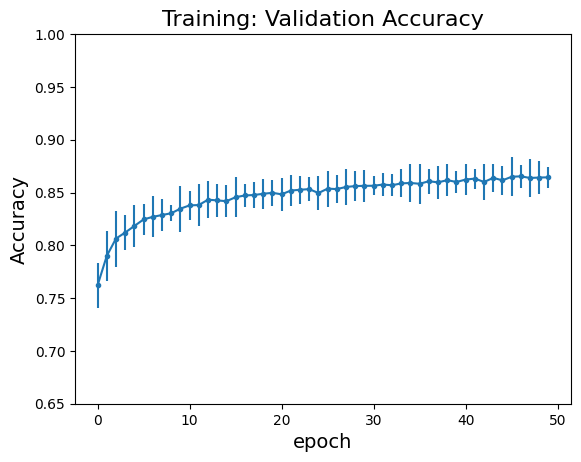

In [ ]:
plt.figure()
plt.errorbar(y = validation_accuracy_list, x = np.arange(len(validation_accuracy_list)), yerr = validation_acc_std_list, fmt = '-o', markersize = '3')
plt.title("Training: Validation Accuracy", fontsize = 16)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('epoch', fontsize = 14)
plt.ylim([.65,1])
plt.show()

In [ ]:
#Accuracy on Test Set:
# Telling PyTorch we aren't passing inputs to network for training purpose
with torch.no_grad():

    test_batch_acc = np.zeros((num_test_batches,))
    test_batch_std = np.zeros((num_test_batches,))
    counter = 0
    for test_features, test_labels in test_batches:

        model.eval()
        # Reshape test images into a vector
        test_features = test_features.reshape(-1, 28*28)

         # Compute validation outputs (targets)
        test_outputs = model(test_features)


         # and compute accuracy
        correct = (torch.argmax(test_outputs, dim=1) ==
                   test_labels).type(torch.FloatTensor)
        #record test acc at this batch
        test_batch_acc[counter] = correct.mean()
        counter = counter + 1



    # Compute total (mean) accuracy
    test_acc = np.mean(test_batch_acc)
    test_std = np.std(test_batch_acc)

    # Report total (mean) accuracy, can also compute std based on batches
    print("Test Accuracy = "+  str(test_acc*100) + '+/-' + str(test_std*100) + '%')

Test Accuracy = 85.849609375+/-2.0697366165445383%


In [ ]:
np.savetxt('acc.csv', validation_accuracy_list, delimiter=',')
np.savetxt('std.csv', validation_acc_std_list, delimiter=',')

In [ ]:
np.savetxt('loss.csv', train_loss_list, delimiter=',')